# Elipse de confianza para $\boldsymbol{\mu}$ de una $N_2(\boldsymbol{\mu}, \boldsymbol{\Sigma})$

<img src="https://raw.githubusercontent.com/fhernanb/fhernanb.github.io/master/docs/logo_unal_color.png" alt="drawing" width="200"/>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data for radiation from microwave ovens were introduced in Examples 4.10 and 4.17.

In [15]:
dt = pd.read_table("table_4-1_and_4-5.txt", sep="\t")
dt = dt**0.25
dt.head()

,rad_closed,rad_open
0,0.622333,0.740083
1,0.547723,0.547723
2,0.651356,0.740083
3,0.562341,0.562341
4,0.472871,0.562341


Para generar dibujar las observaciones usamos:

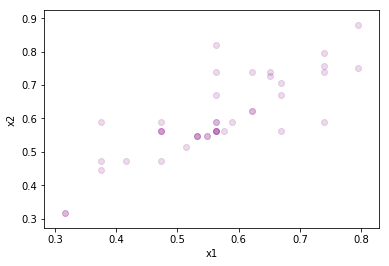

In [17]:
plt.scatter(x=dt.rad_closed, y=dt.rad_open, color='purple', alpha=0.15)
plt.xlabel('x1')
plt.ylabel('x2');

The next function was made by [Syrtis Major](https://stackoverflow.com/users/2144720/syrtis-major)

In [18]:
from scipy.stats import norm, chi2

def conf_ellipse(cov, q=None, nsig=None, **kwargs):
    """
    Parameters
    ----------
    cov : (2, 2) array Covariance matrix.
    q : float, optional. Confidence level, should be in (0, 1)
    nsig : int, optional. Confidence level in unit of standard deviations. 
        E.g. 1 stands for 68.3% and 2 stands for 95.4%.

    Returns
    -------
    width, height, rotation :
         The lengths of two axises and the rotation angle in degree
    for the ellipse.
    """

    if q is not None:
        q = np.asarray(q)
    elif nsig is not None:
        q = 2 * norm.cdf(nsig) - 1
    else:
        raise ValueError('One of `q` and `nsig` should be specified.')
    r2 = chi2.ppf(q, 2)**0.5

    val, vec = np.linalg.eigh(cov)
    width, height = 2 * (val[:, None] * r2)**0.5
    rotation = np.degrees(np.arctan2(*vec[::-1, 0]))

    return width, height, rotation

A continuación la información para construir la elipse y se almacena en el objeto `elip`

In [23]:
sigma  = dt.cov()
medias = dt.mean()

In [25]:
elip = conf_ellipse(cov=sigma, q=0.50)

Para crear la elipse se usa la función `Ellipse`

NameError: name 'x' is not defined

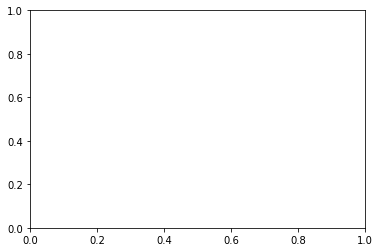

In [26]:
from matplotlib.patches import Ellipse

elipse = Ellipse(xy=medias, width=elip[0], height=elip[1], angle=elip[2], color='blue')
elipse.set_facecolor('none')

ax = plt.subplot(111)
plt.scatter(x[:,0], x[:,1], alpha=0.3)
plt.xlabel('Peso (kg)')
plt.ylabel('Estatura (cm)')
plt.title('Elipse de confianza del 50%')
ax.add_artist(elipse)  # Para agregar la elipse

## Calculando las distancias de Mahalanobis

$D^2 = (\boldsymbol{X}-\boldsymbol{\mu})^\top \boldsymbol{\Sigma}^{-1} (\boldsymbol{X}-\boldsymbol{\mu})$

In [6]:
from scipy.spatial.distance import cdist

medias = [[65, 165]]       # Vector de medias
vi = np.linalg.inv(sigma)  # Inversa de Sigma

d = cdist(XA=x, XB=medias, metric='mahalanobis', VI=vi)
d2 = d**2  # Para que genere d2, de lo contrario entrega sólo d

In [7]:
results = d2 < chi2.ppf(q=0.5, df=2)

In [8]:
sum(sum(results))  # Para saber cuántos puntos están dentro de la elipse

49